In [ ]:
# Installing the packages we have used
install.packages("tidyverse")
install.packages("gmodels")
install.packages("tm")
install.packages("naniar")
install.packages("caTools")
install.packages("caret")
install.packages("randomForest")

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gtools’, ‘gdata’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘NLP’, ‘Rcpp’, ‘slam’, ‘BH’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘gridExtra’, ‘plyr’, ‘norm’, ‘visdat’, ‘viridis’, ‘UpSetR’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependency ‘bitops’


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMe

In [ ]:
# Loading the libraries we have used
library(tidyverse) 
library(gmodels)
library(naniar)
library(tm)
library(caTools)
library(e1071)
library(caret)
library(randomForest)

Warning message in system("timedatectl", intern = TRUE):
“running command 'timedatectl' had status 1”
── Attaching packages ─────────────────────────────────────── tidyverse 1.3.2 ──
✔ ggplot2 3.4.0      ✔ purrr   0.3.5 
✔ tibble  3.1.8      ✔ dplyr   1.0.10
✔ tidyr   1.2.1      ✔ stringr 1.4.1 
✔ readr   2.1.3      ✔ forcats 0.5.2 
── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()
Loading required package: NLP


Attaching package: ‘NLP’


The following object is masked from ‘package:ggplot2’:

    annotate


Loading required package: lattice


Attaching package: ‘caret’


The following object is masked from ‘package:purrr’:

    lift


randomForest 4.7-1.1

Type rfNews() to see new features/changes/bug fixes.


Attaching package: ‘randomForest’


The following object is masked from ‘package:dplyr’:

    combine


The following object is masked from ‘package:ggplot2’:

    margin

In [ ]:
# Reading the data 
data <- read.csv("news.csv")
summary(data)

# Removing ID column from the dataset
data <- data[,-1]
# Removing title column from the dataset
data <- data[,-1]

       X            title               text              label          
 Min.   :    2   Length:6335        Length:6335        Length:6335       
 1st Qu.: 2674   Class :character   Class :character   Class :character  
 Median : 5271   Mode  :character   Mode  :character   Mode  :character  
 Mean   : 5280                                                           
 3rd Qu.: 7901                                                           
 Max.   :10557                                                           

In [ ]:
# First, let's check if the data contains any missing values
anyNA(data)
# Let's check if there are any duplicates using duplicated()
sum(duplicated(data$X))

[1] FALSE

[1] 0

label,count
<chr>,<int>
FAKE,3164
REAL,3171


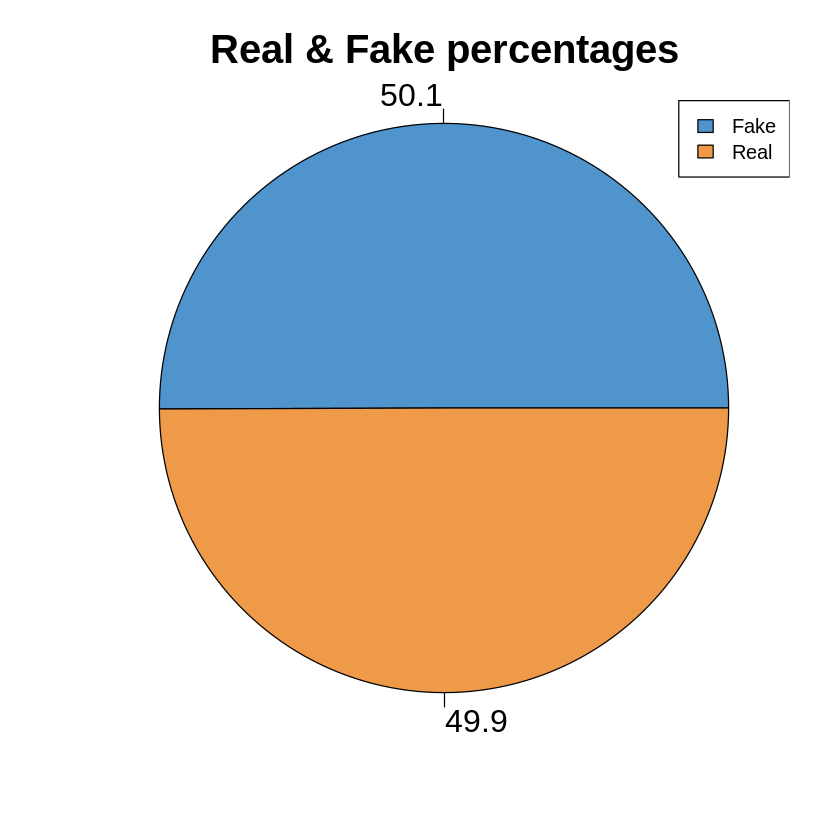

In [ ]:
# Counting how many fake and real news
data %>% group_by(label) %>% summarise(count=n())

# Converting label column to factor 
data$label <- factor(data$label)

# Printing the number of fake and real news
real <- as.numeric(table(data$label)[1])
fake <- as.numeric(table(data$label)[2])
total <- fake + real

# Creating data for the pie chart
x <- c(fake / total, real / total)
labels <- c("Fake", "Real")
piepercent <- round(100 * x / sum(x), 1)

# Plotting the pie chart
pie(x, piepercent, main = "Real & Fake percentages", col = c("steelblue3", "tan2"), radius = 1, cex = 1.6, cex.main = 2)
legend("topright", c("Fake", "Real"), cex = 1, fill = c("steelblue3", "tan2"))

label,Exclamation
<fct>,<int>
FAKE,5405
REAL,3949


Standard deviation of exclamation marks = 1.949726

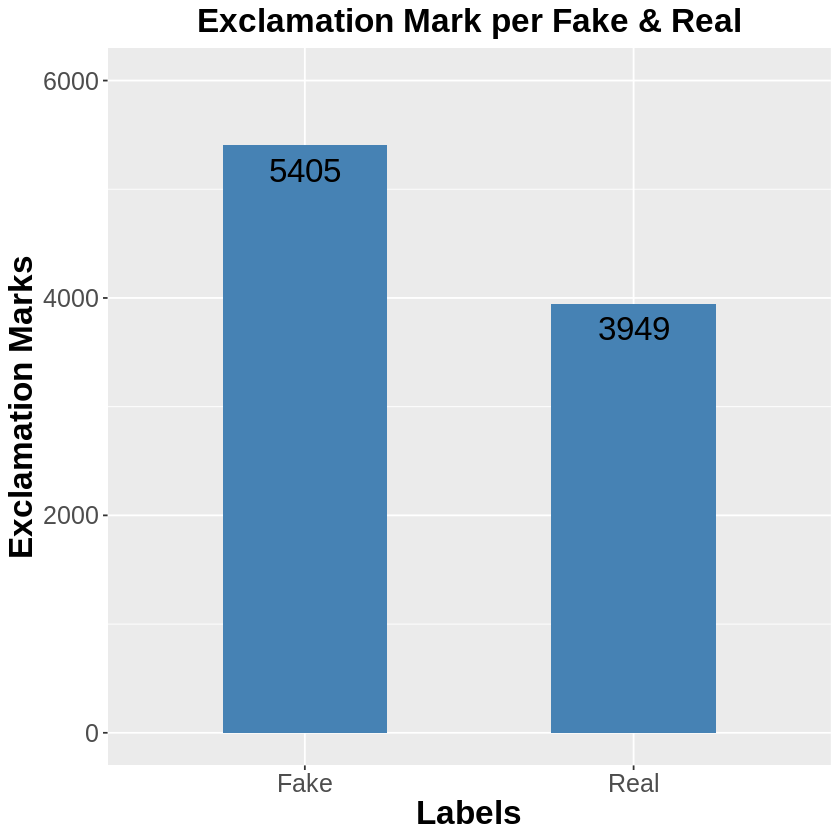

In [ ]:
# Applying a function for finding exclamation marks
data$exc <- sapply(data$text, function(x) length(unlist(strsplit(as.character(x), "\\!+"))))
# Counting exclamation marks in fake and real news
data %>% group_by(label) %>% summarise(Exclamation = sum(exc))
# Printing the standard deviation of the exclamation marks count
cat("Standard deviation of exclamation marks =", sd(data$exc))

# Getting the number of exclamation marks in each fake and real news
fake_exc <- sum(subset(data, label == "FAKE")$exc)
real_exc <- sum(subset(data, label == "REAL")$exc)

# Creating data for the bar chart
value <- c(fake_exc, real_exc)
Labels <- c("Fake", "Real")
df <- data.frame(Fake_Real = Labels, Exclamation_Mark = value)

# Plotting the bar chart
theme_update(plot.title = element_text(hjust = 0.5))
p <- ggplot(data = df, aes(x = labels, y = value)) +
     geom_bar(stat = "identity", width = 0.5, fill = "steelblue") +
     geom_text(aes(label = value), vjust = 1.6, color = "black", size = 7) +
     coord_cartesian(ylim = c(0, 6000)) +
     ggtitle("Exclamation Mark per Fake & Real") +
     xlab("Labels") + ylab("Exclamation Marks") +
     theme(axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 15), axis.title = element_text(size = 20,face = "bold"), plot.title = element_text(size = 20, face = "bold"))
p

label,Question_Marks
<fct>,<int>
FAKE,8663
REAL,7241


Standard deviation of question marks = 3.898885

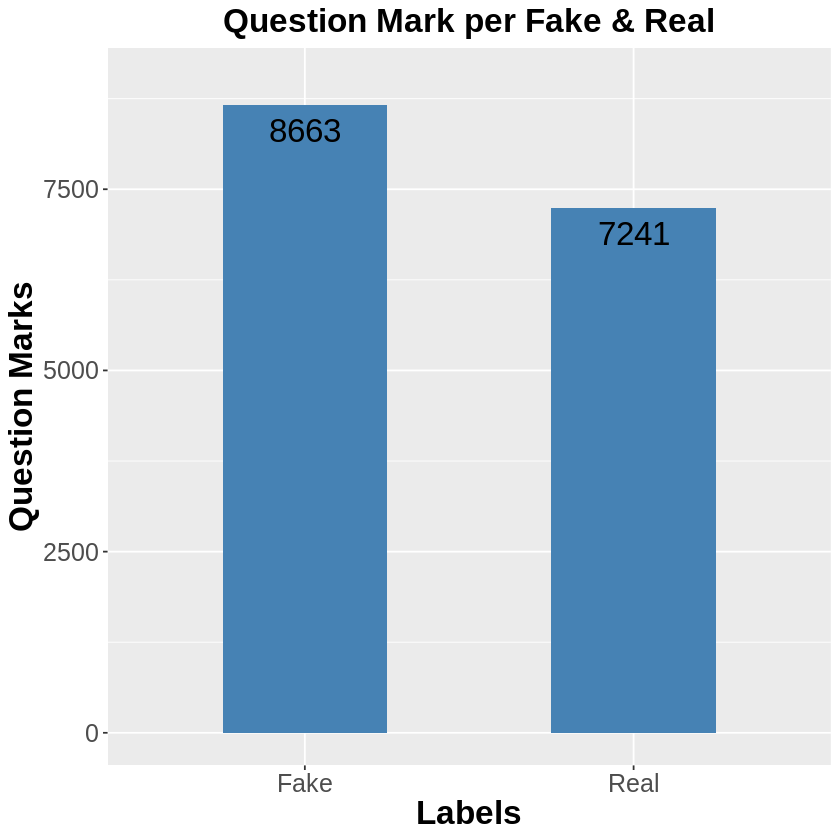

In [ ]:
# Applying a function for finding question marks
data$ques <- sapply(data$text, function(x) length(unlist(strsplit(as.character(x), "\\?+"))))
# Counting question marks in fake and real news
data %>% group_by(label) %>% summarise(Question_Marks = sum(ques))
# Printing the standard deviation of the question marks count
cat("Standard deviation of question marks =", sd(data$ques))

# Getting the number of question marks in each fake and real news
fake_ques <- sum(subset(data, label == "FAKE")$ques)
real_ques <- sum(subset(data, label == "REAL")$ques)

# Creating data for the bar chart
value <- c(fake_ques, real_ques)
Labels <- c("Fake", "Real")
df <- data.frame(Fake_Real = Labels, Question_Mark = value)

# Plotting the bar chart 
theme_update(plot.title = element_text(hjust = 0.5))
p <- ggplot(data = df, aes(x = labels, y = value)) +
     geom_bar(stat = "identity", width = 0.5, fill = "steelblue") +
     geom_text(aes(label = value), vjust = 1.6, color = "black", size = 7) +
     coord_cartesian(ylim = c(0, 9000)) +
     ggtitle("Question Mark per Fake & Real") +
     xlab("Labels") + ylab("Question Marks") +
     theme(axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 15), axis.title = element_text(size = 20, face = "bold"), plot.title = element_text(size = 20, face = "bold"))
p

In [ ]:
# Cleaning text column
# Removing mentions, hashtags, numbers, urls, punctuations, emojis, newlines and extra spaces.
data$text <- tolower(data$text)
data$text <- gsub('[^[:alnum:] ]', '', data$text)
data$text <- gsub("@\\w+", "", data$text)
data$text <- gsub("#\\w+", "", data$text)
data$text <- removeNumbers(data$text)
data$text <- gsub("https://.+", "", data$text)
data$text <- removePunctuation(data$text)
data$text <- gsub('\\p{So}|\\p{Cn}', '', data$text, perl = TRUE)
data$text <- gsub("\n", "", data$text)
data$text <- trimws(gsub("\\s+", " ", data$text))

In [ ]:
# Applying tokenization method 
dtm <- DocumentTermMatrix(data$text)

# Removing SparseTerms
# Here we keep the '0.999' of columns  and remove the columns that have the least amount of ones '0.001' 
dtm <- removeSparseTerms(dtm, 0.999)
dataset <- as.data.frame(as.matrix(dtm))

# Encoding the target feature as factor
dataset$label <- data$label
head(dataset)

# Making the label column zeros and ones only
dataset$label <- gsub("FAKE", 0, dataset$label)
dataset$label <- gsub("REAL", 1, dataset$label)

dataset$label <- factor(dataset$label, levels = c(0, 1))
which(colnames(dataset) == "label")

,abedin,about,abuses,accused,accusing,act,admits,ads,afraid,after,⋯,tread,sprott,candidacythe,deleterious,motivates,bunning,cheerful,slides,slopes,surfacing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
1,1,2,1,1,2,4,1,1,3,1,⋯,0,0,0,0,0,0,0,0,0,0
2,0,3,0,0,0,0,0,0,0,3,⋯,0,0,0,0,0,0,0,0,0,0
3,0,4,0,0,0,1,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
4,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
6,0,3,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


[1] 2231

In [ ]:
# Splitting the dataset into the training and test sets
training_set <- dataset[1:5068,]
test_set <- dataset[5069:6335,]

# Fitting Random Forest Classification to the training set
set.seed(123)
# Here we except the column number 2231 "label column"  
classifier <- randomForest(x = training_set[-2231],
                          y = training_set$label,
                          ntree = 20)

# Predicting the Test set results
head(test_set)
y_pred <- predict(classifier, newdata = test_set[-2231])

# Making the Confusion Matrix
cm <- table(test_set[,2231], y_pred)
confusionMatrix(cm)

,abedin,about,abuses,accused,accusing,act,admits,ads,afraid,after,⋯,tread,sprott,candidacythe,deleterious,motivates,bunning,cheerful,slides,slopes,surfacing
,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,⋯,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
5069,0,1,0,1,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
5070,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5071,0,1,0,0,0,0,0,0,0,1,⋯,0,0,0,0,0,0,0,0,0,0
5072,0,1,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5073,0,2,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
5074,0,2,0,0,0,0,0,0,0,2,⋯,0,0,0,0,0,0,0,0,0,0


Confusion Matrix and Statistics

   y_pred
      0   1
  0 551  93
  1  84 539
                                        
               Accuracy : 0.8603        
                 95% CI : (0.84, 0.8789)
    No Information Rate : 0.5012        
    P-Value [Acc > NIR] : <2e-16        
                                        
                  Kappa : 0.7206        
                                        
 Mcnemar's Test P-Value : 0.5476        
                                        
            Sensitivity : 0.8677        
            Specificity : 0.8528        
         Pos Pred Value : 0.8556        
         Neg Pred Value : 0.8652        
             Prevalence : 0.5012        
         Detection Rate : 0.4349        
   Detection Prevalence : 0.5083        
      Balanced Accuracy : 0.8603        
                                        
       'Positive' Class : 0             
                                        

In [ ]:
# Applying tokenization method 
data_doc <- DocumentTermMatrix(data$text)

# Splitting the dataset into the training and test sets
TrainingDataset <- data_doc[1:5068,]
TestDataset <- data_doc[5069:6335,]
Train_Labels <- data[1:5068,]$label
Test_Labels <- data[5069:6335,]$label

# Printing proportions
prop.table(table(Train_Labels))
prop.table(table(Test_Labels))

Train_Labels
     FAKE      REAL 
0.4972376 0.5027624 

Test_Labels
     FAKE      REAL 
0.5082873 0.4917127 

In [ ]:
# Finding the frequent words 
Frequent_Words <- findFreqTerms(TrainingDataset, 10)

# Putting the frequent words in TrainingDataset and TestDataset
Freq_Train <- TrainingDataset[ ,Frequent_Words]
Freq_Test <- TestDataset[ ,Frequent_Words]

# Checking if a word is present in line 
count <- function(x)
{
    x <- ifelse(x > 0, "Yes", "No")
}

Train <- apply(Freq_Train, MARGIN = 2, count)
Test <- apply(Freq_Test, MARGIN = 2, count)

In [ ]:
# Applying Naive Bayes Algorithm
# Fitting Naive Bayes Model to training dataset
classifier_cl <- naiveBayes(Train, Train_Labels)

# Predicting on test data
y_pred <- predict(classifier_cl, Test)

# Confusion Matrix
CM <- table(Test_Labels, y_pred)

# Model Evaluation
confusionMatrix(CM)

Confusion Matrix and Statistics

           y_pred
Test_Labels FAKE REAL
       FAKE  566   78
       REAL  165  458
                                          
               Accuracy : 0.8082          
                 95% CI : (0.7854, 0.8295)
    No Information Rate : 0.577           
    P-Value [Acc > NIR] : < 2.2e-16       
                                          
                  Kappa : 0.6154          
                                          
 Mcnemar's Test P-Value : 3.45e-08        
                                          
            Sensitivity : 0.7743          
            Specificity : 0.8545          
         Pos Pred Value : 0.8789          
         Neg Pred Value : 0.7352          
             Prevalence : 0.5770          
         Detection Rate : 0.4467          
   Detection Prevalence : 0.5083          
      Balanced Accuracy : 0.8144          
                                          
       'Positive' Class : FAKE            
                       

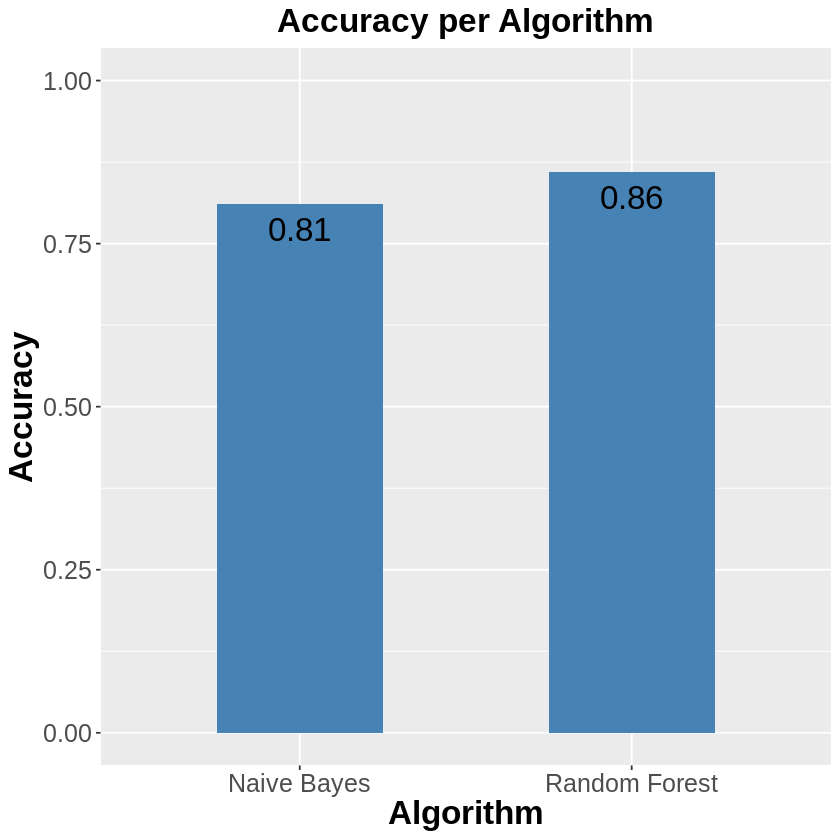

In [ ]:
# Creating data for the bar chart
acc <- c(round((cm[[1,1]] + cm[[2,2]]) / sum(cm), digits = 2), round((CM[[1,1]] + CM[[2,2]]) / sum(CM), digits = 2))
algorithms <- c("Random Forest", "Naive Bayes")
df <- data.frame(Algorithm = algorithms, Accuracy = acc)

# Plotting the bar chart
theme_update(plot.title = element_text(hjust = 0.5))
p <- ggplot(data = df, aes(x = Algorithm, y = Accuracy)) +
     geom_bar(stat = "identity", width = 0.5, fill = "steelblue") +
     geom_text(aes(label = Accuracy), vjust = 1.6, color = "black", size = 7) +
     coord_cartesian(ylim = c(0, 1)) + ggtitle("Accuracy per Algorithm") +
     theme(axis.text.x = element_text(size = 15), axis.text.y = element_text(size = 15), axis.title = element_text(size = 20, face = "bold"), plot.title = element_text(size = 20, face = "bold"))
p

In [ ]:
write.csv(data, file = 'data.csv', row.names = FALSE)